classes =classes+background

class 0 is background.

Image annnotation
- id(this is image id)
- width(image x axis)
- height (image y axis)
- file_name(file path)


Mask anotation 
- id(this is antoation id)
- iscrowd()
- image_id(says image no/id)
- category_id(says its class/label)
- segmentation(mask points (or) polygon points (or) xy coordinates)
- bbox
- area

Mask Condition:
---------------
- Masks have the same sizes as images.
- Masks have only 0 - background and 1 - target class values (for binary segmentation).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from pycocotools.coco import COCO
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, models

import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class Segmentation_Dataset(Dataset):
  def __init__(self, json_path):
    super(Segmentation_Dataset).__init__()
    self.json_path = json_path
    self.coco = COCO(self.json_path)
    self.ids = list(sorted(self.coco.imgs.keys()))
    print(self.ids,"idsssss of imgggggggggggggggggggggg")
    self.transforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])


  def __getitem__(self, index):
    self.image_id = self.ids[index]
    print(self.image_id,"image idsssssssssssssssssss")
    self.annotation_ids = self.coco.getAnnIds(self.image_id)
    print(self.annotation_ids,"annnnnnnnnnnnnnnnnnnnnnnidssssssssssssssgettttttttttttttttttttgettttt")

    self.coco_annotation = self.coco.loadAnns(self.annotation_ids)
    print(self.coco_annotation,"loaddddddddddddddddddddddddddddddd annnnnnnnnnnnnnnnnnnnnnnnnnasss")
    self.image_annotation = self.coco.loadImgs(self.image_id)
    print(self.image_annotation,"imageloaddddddddddddddddddddddddddddddssssssssss")

    self.image_name = self.image_annotation[0]['file_name']
    self.image_path = os.path.join("drive/MyDrive/coolab/Sample_data/", self.image_name)
    self.pil_image = Image.open(self.image_path)

    self.dummy_mask = np.zeros((self.image_annotation[0]['height'], self.image_annotation[0]['width']))
    for i in range(len(self.coco_annotation)):
      self.dummy_mask = np.maximum(self.dummy_mask,  self.coco.annToMask(self.coco_annotation[i]) *self.coco_annotation[i]['category_id'])

    self.tensor_image = self.transforms(self.pil_image)
    self.tensor_mask = self.transforms(Image.fromarray(self.dummy_mask))

    return self.tensor_image, self.tensor_mask

  def __len__(self):
    return len(self.ids)

In [ ]:
json_path = "drive/MyDrive/coolab/json/labels_my-project-name_2022-09-09-10-23-05.json"
images_path = "drive/MyDrive/coolab/Sample_data/"

dataset  = Segmentation_Dataset(json_path)

loading annotations into memory...
Done (t=1.65s)
creating index...
index created!
[1, 2, 3, 4, 5, 6, 7, 8] idsssss of imgggggggggggggggggggggg


In [ ]:
dataset[2]

3 image idsssssssssssssssssss
[2, 3, 4] annnnnnnnnnnnnnnnnnnnnnnidssssssssssssssgettttttttttttttttttttgettttt
[{'id': 2, 'iscrowd': 0, 'image_id': 3, 'category_id': 2, 'segmentation': [[156.4516129032258, 111.87096774193547, 192.74193548387095, 98.96774193548386, 192.74193548387095, 98.96774193548386, 205.64516129032256, 99.77419354838709, 226.61290322580643, 110.25806451612902, 249.19354838709677, 124.77419354838709, 249.19354838709677, 124.77419354838709, 252.41935483870967, 129.61290322580643, 252.41935483870967, 129.61290322580643, 268.54838709677415, 121.54838709677419, 268.54838709677415, 121.54838709677419, 279.83870967741933, 112.6774193548387, 279.83870967741933, 113.48387096774192, 296.7741935483871, 100.58064516129032, 296.7741935483871, 100.58064516129032, 331.4516129032258, 90.09677419354838, 350.80645161290323, 93.32258064516128, 358.06451612903226, 94.12903225806451, 358.06451612903226, 94.12903225806451, 382.258064516129, 79.61290322580645, 399.19354838709677, 67.516129

(tensor([[[0.3882, 0.3373, 0.3922,  ..., 0.4784, 0.5020, 0.5098],
          [0.4667, 0.4078, 0.4275,  ..., 0.6235, 0.6039, 0.5608],
          [0.4431, 0.4078, 0.3804,  ..., 0.7176, 0.8196, 0.8118],
          ...,
          [0.1255, 0.1451, 0.1333,  ..., 0.2902, 0.3216, 0.3059],
          [0.0824, 0.0902, 0.1255,  ..., 0.3098, 0.3333, 0.2549],
          [0.0980, 0.0784, 0.1137,  ..., 0.2235, 0.2353, 0.3020]],
 
         [[0.4118, 0.3686, 0.4392,  ..., 0.4078, 0.4431, 0.4588],
          [0.4980, 0.4471, 0.4745,  ..., 0.5216, 0.5216, 0.4863],
          [0.4863, 0.4510, 0.4275,  ..., 0.5804, 0.7020, 0.7059],
          ...,
          [0.1765, 0.1882, 0.1529,  ..., 0.3098, 0.3216, 0.3059],
          [0.1373, 0.1255, 0.1333,  ..., 0.3216, 0.3647, 0.2941],
          [0.1529, 0.1098, 0.1176,  ..., 0.2510, 0.3020, 0.3804]],
 
         [[0.2745, 0.2314, 0.2941,  ..., 0.2745, 0.3569, 0.3922],
          [0.3451, 0.2902, 0.3176,  ..., 0.3686, 0.3804, 0.3529],
          [0.3059, 0.2706, 0.2549,  ...,

In [ ]:
num_class = 2+1 # background

from torchvision.models.segmentation.fcn import FCNHead
model = models.segmentation.fcn_resnet101(pretrained = True)
model.classifier = FCNHead(2048, num_class)
model.aux_classifier = FCNHead(1024, num_class)
model = model.to("cuda:0")

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FCN_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch.optim as optim
import torch.nn as nn
from torch.optim import lr_scheduler

In [ ]:
dl_train = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
epochs = 50
lr = 0.0001
optimizer = torch.optim.SGD(model.parameters() , lr, momentum = 0.9)
criterion = nn.CrossEntropyLoss()

losses = []
for epoch in range(epochs):
    running_loss = 0
    total_train = 0
    correct_train = 0 
    print("Epoch :", epoch)
    for i,data in enumerate(dl_train):
        inputs,label = data    
        optimizer.zero_grad()
        
        output = model(inputs.to("cuda:0"))
        loss = criterion(output['out'].cpu(), label.squeeze(0).type(torch.LongTensor))

        print(loss, "Lossss")
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        

        

Epoch : 0
tensor(1.0436, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(1.0895, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(1.1057, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(1.0372, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(1.0311, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(1.0477, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(0.9869, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(1.0485, grad_fn=<NllLoss2DBackward0>) Lossss
Epoch : 1
tensor(0.8997, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(0.8948, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(0.8993, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(0.8078, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(0.8327, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(0.8559, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(0.7966, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(0.8956, grad_fn=<NllLoss2DBackward0>) Lossss
Epoch : 2
tensor(0.7699, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(0.7097, grad_fn=<NllLoss2DBackward0>) Lossss
tensor(0.7242, grad_fn=<NllLoss2DB

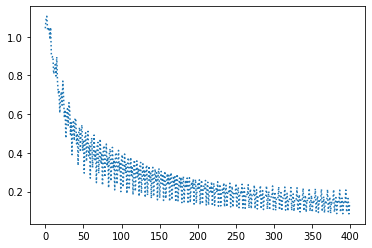

In [ ]:
plt.plot(losses, linestyle = 'dotted')
plt.show()

In [ ]:
model = model.eval()
test_losses = []
with torch.no_grad():
  for i,data in enumerate(dl_train):
      inputs,label = data        
      output = model(inputs.to("cuda:0"))
      loss = criterion(output['out'].cpu(), label.squeeze(0).type(torch.LongTensor))

      print(loss, "Lossss")
      test_losses.append(loss.item())

tensor(0.1666) Lossss
tensor(0.3664) Lossss
tensor(20.6833) Lossss
tensor(0.1061) Lossss
tensor(0.1848) Lossss
tensor(2.4941) Lossss
tensor(1.6746) Lossss
tensor(27.6863) Lossss


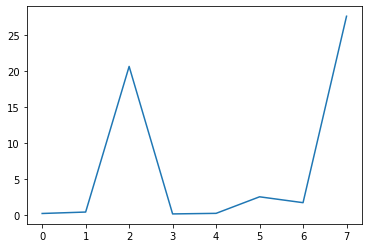

In [ ]:
plt.plot(test_losses)

torch.Size([3, 288, 300])


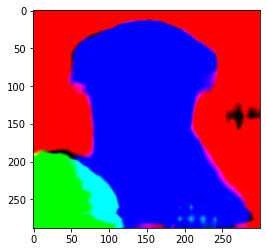

In [ ]:
model = model.to('cpu').eval()
input_img = Image.open("drive/MyDrive/coolab/Sample_data/4.jpg")
tensor_img = transforms.Compose([transforms.ToTensor()])(input_img)
print(tensor_img.shape)
output = model(tensor_img.unsqueeze(0))
output = output['out'].detach().squeeze().permute(1,2,0).numpy()

# output = output['out'].cpu().detach().numpy()
# mask =  np.argmax(output,axis=0)
# print()



plt.imshow(output)
plt.show()

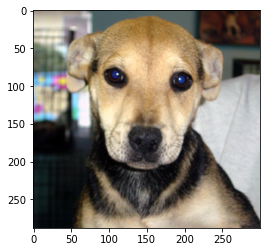

In [ ]:
plt.imshow(input_img)